# Banking Case Study



### Business Understanding
 
- Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

- In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

- Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

- Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

- By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

- Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

- Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.



### Problem Statement:
- Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc...
- Predict if in case the loan is given, will the customer default or not on the Loan payments.


#### Import the required Libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
os.getcwd()

'C:\\Users\\dell'

### Step - 1: Load the data


In [4]:
d = pd.read_csv('C://Users//dell//Downloads//credit_risk_dataset.csv')
d

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Detailed data description of Credit Risk dataset:


In [5]:
d.shape

(32581, 12)

In [6]:
d.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
d.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Fill missing value with median as there is an outliers:

In [9]:
d[['person_emp_length', 'loan_int_rate']]= d[['person_emp_length', 'loan_int_rate']].fillna(d[['person_emp_length', 'loan_int_rate']].median())

In [10]:
d.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
d.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [12]:
d.columns.tolist()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [13]:
d.mean().to_frame().T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,27.7346,66074.84847,4.767994,9589.371106,11.00962,0.218164,0.170203,5.804211


In [14]:
d.median().to_frame().T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,26.0,55000.0,4.0,8000.0,10.99,0.0,0.15,4.0


In [15]:
d.std().to_frame().T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,6.348078,61983.119168,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001


In [16]:
d.skew().to_frame().T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,2.581393,32.865349,2.662878,1.192477,0.221318,1.364888,1.064669,1.66179


In [17]:
d.var().to_frame().T

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,40.2981,3.841907e+09,16.706607,3.996878e+07,9.496327,0.170574,0.011402,16.443034


In [18]:
num = d.select_dtypes(include = 'number').columns
num

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [19]:
cat = d.select_dtypes(exclude = 'number').columns
cat

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

### Detection of outliers

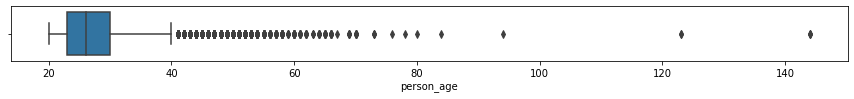

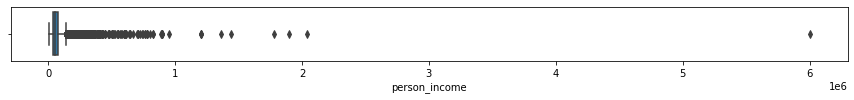

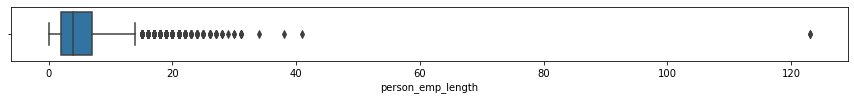

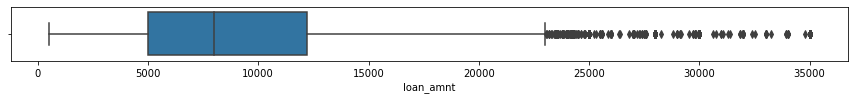

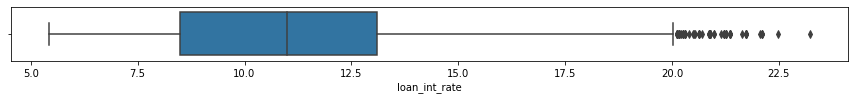

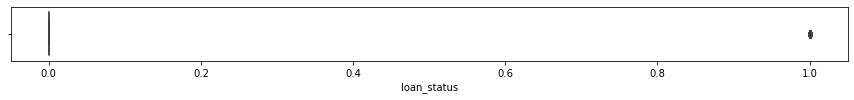

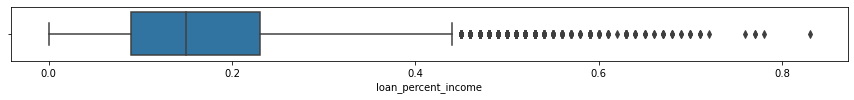

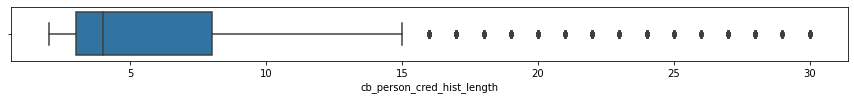

In [112]:
for i in num:
    plt.figure(figsize=(15,1))
    sns.boxplot(d[i])
    plt.show()

### Inter Quartile Range(IQR):
- Inter Quartile Range : iqr = q3-q1

- lb = q1 - 1.5*iqr

- ub = q3 - 1.5*iqr

#### Removal of Outliers using IQR

In [24]:
q1 = d['person_age'].quantile(0.25)
q3 = d['person_age'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = d[(d['person_age'] > ub)].index
Outliers

Int64Index([   81,   183,   575,   747, 29121, 29124, 29127, 29131, 29133,
            29137,
            ...
            32571, 32572, 32573, 32574, 32575, 32576, 32577, 32578, 32579,
            32580],
           dtype='int64', length=1494)

In [25]:
d.drop(Outliers,inplace=True)

In [26]:
len(d['person_age'])

31087

In [28]:
q1 = d['person_income'].quantile(0.25)
q3 = d['person_income'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = d[(d['person_income'] > ub)].index
Outliers

Int64Index([   15,    20,    33,    34,    42,    43,    44,    45,    46,
               55,
            ...
            32152, 32175, 32197, 32201, 32224, 32231, 32249, 32253, 32268,
            32292],
           dtype='int64', length=1476)

In [29]:
d.drop(Outliers,inplace=True)

In [30]:
len(d['person_income'])

29611

In [31]:
q1 = d['loan_amnt'].quantile(0.25)
q3 = d['loan_amnt'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = d[(d['loan_amnt'] < lb) | (d['loan_amnt'] > ub)].index
Outliers

Int64Index([    0,     3,     4,     6,     7,     8,    10,    12,    13,
               14,
            ...
            31738, 31739, 31745, 31955, 31987, 32018, 32071, 32108, 32158,
            32288],
           dtype='int64', length=1272)

In [32]:
d.drop(Outliers,inplace=True)

In [33]:
len(d['loan_amnt'])

28339

In [34]:
q1 = d['cb_person_cred_hist_length'].quantile(0.25)
q3 = d['cb_person_cred_hist_length'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = d[(d['cb_person_cred_hist_length'] < lb) | (d['cb_person_cred_hist_length'] > ub)].index
Outliers

Int64Index([29201, 29218, 29255, 29260, 29261, 29262, 29279, 29286, 29288,
            29289,
            ...
            32260, 32261, 32267, 32272, 32274, 32276, 32287, 32289, 32290,
            32296],
           dtype='int64', length=977)

In [35]:
d.drop(Outliers,inplace=True)

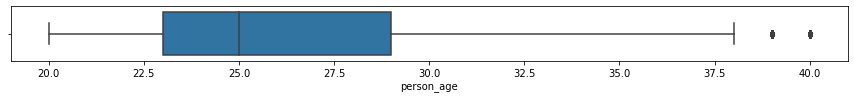

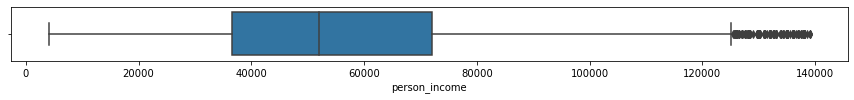

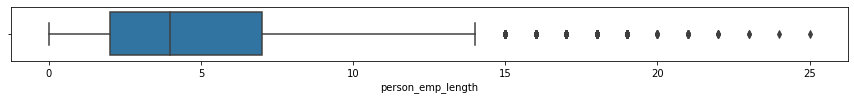

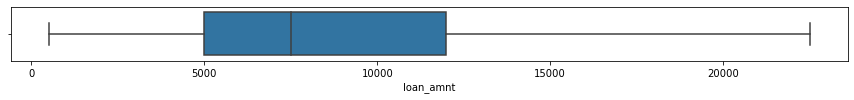

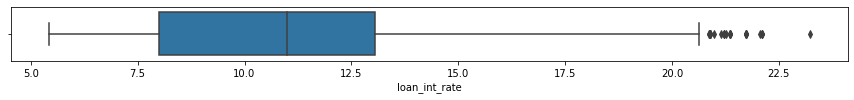

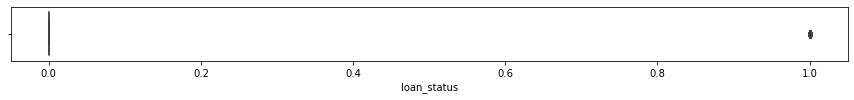

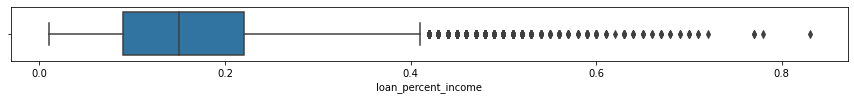

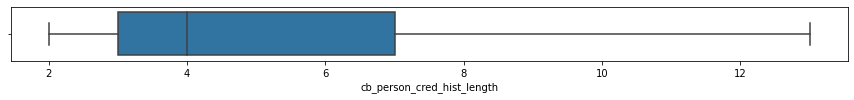

In [38]:
for i in num:
    plt.figure(figsize=(15,1))
    sns.boxplot(d[i])
    plt.show()

In [39]:
d.shape

(27362, 12)

In [64]:
d.to_csv('C://Users//dell//Downloads//credit_risk_dataset.csv')


In [143]:
d = pd.read_csv('C://Users//dell//Downloads//credit_risk_dataset.csv')
d.drop(['Unnamed: 0'],axis =1,inplace = True)
d.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
3,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
4,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2


### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Missing Values
- Outliers

### Univariant Analysis
#### Numerical

In [65]:
num

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

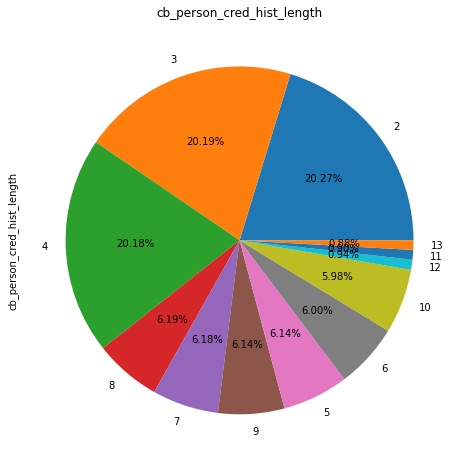

In [66]:
plt.figure(figsize=(12,8))
d['cb_person_cred_hist_length'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('cb_person_cred_hist_length')
plt.show()

### Observation:This plot shows that 'cb_person_cred_hist_length' of 2 has high 20.27%


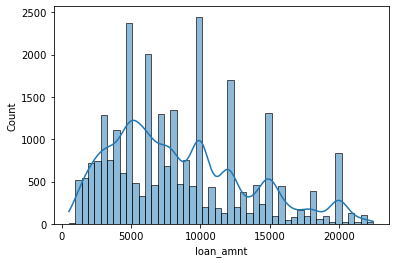

In [67]:
sns.histplot(d['loan_amnt'],kde = True)
plt.show()

### Observation:From hist plot we can observe that maximum loan_count of 10000 has count of 2700.


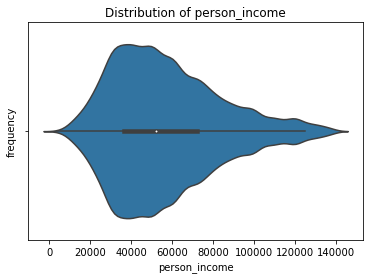

In [68]:
plt.title('Distribution of person_income')
plt.ylabel("frequency")
sns.violinplot(d['person_income'])
plt.show()

### Observation: Above plot represents that frequency of 'person_income' ranges in between 10000 - 125000

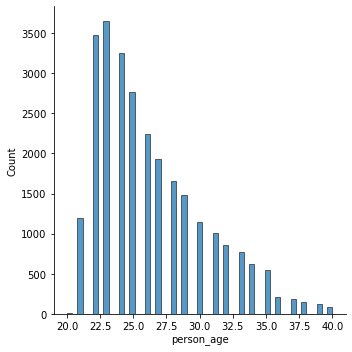

In [69]:
sns.displot(d['person_age'], kind = 'hist')
plt.show()

### Observation: This plot represent maximum count of 'person_age- 22.5'  is above 3500.

#### Categorical

In [70]:
cat

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

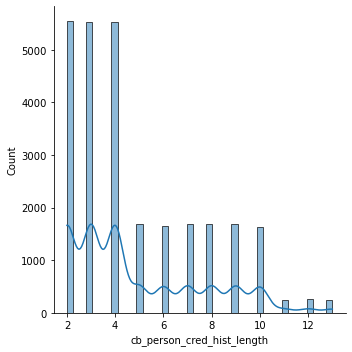

In [71]:

sns.displot(d['cb_person_cred_hist_length'],kde = True )
plt.show()

### Observation: From above graph we observe that 'cb_person_cred_hist_length' has more count from 2-4 which is abve 5000.

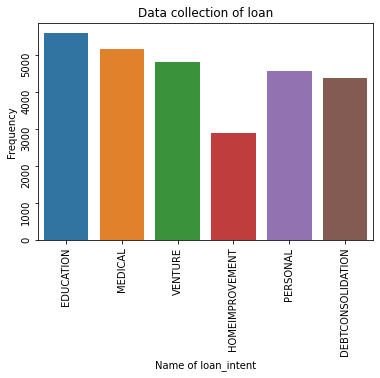

In [144]:
sns.countplot(x = 'loan_intent',data = d)
plt.title('Data collection of loan')
plt.xlabel('Name of loan_intent')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

### Observation: From the above bar graph loan_intent of education frequency is high compare to others.

### Bivariate Analysis
#### Numerical-Numerical

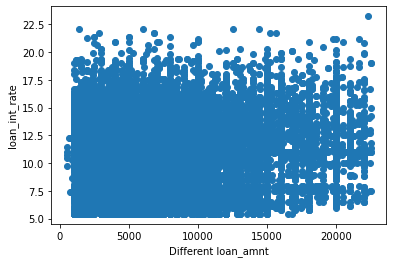

In [79]:
plt.scatter(d['loan_amnt'],d['loan_int_rate'])
plt.xlabel('Different loan_amnt')
plt.ylabel('loan_int_rate')
plt.show()

In [80]:
d.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.099729,0.174208,0.037483,0.005492,-0.030853,-0.033756,0.790588
person_income,0.099729,1.000000,0.199059,0.327345,-0.062410,-0.283520,-0.404638,0.063062
person_emp_length,0.174208,0.199059,1.000000,0.090947,-0.065939,-0.092659,-0.066957,0.140391
loan_amnt,0.037483,0.327345,0.090947,1.000000,0.083409,0.083738,0.624001,0.027532
loan_int_rate,0.005492,-0.062410,-0.065939,0.083409,1.000000,0.309517,0.096295,0.010888
loan_status,-0.030853,-0.283520,-0.092659,0.083738,0.309517,1.000000,0.372439,-0.021387
loan_percent_income,-0.033756,-0.404638,-0.066957,0.624001,0.096295,0.372439,1.000000,-0.015407
cb_person_cred_hist_length,0.790588,0.063062,0.140391,0.027532,0.010888,-0.021387,-0.015407,1.000000


(<AxesSubplot:>,)

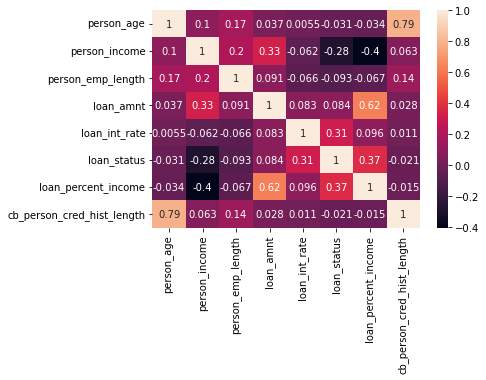

In [81]:
cor = d.corr()
sns.heatmap(cor,annot = True),

### Observation: From this heat map we observe that there is a positive correlation in between person_age and cb_person_cred_hist_length.

#### Numerical- Categorical

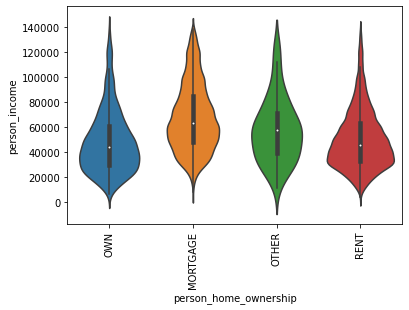

In [82]:
sns.violinplot(x= d['person_home_ownership'],y= d['person_income'],data = d)
plt.xticks(rotation=90)
plt.show()

### Observation: We observe that in 'person_home_ownership' Moritage and Own has more income which is near to 140000

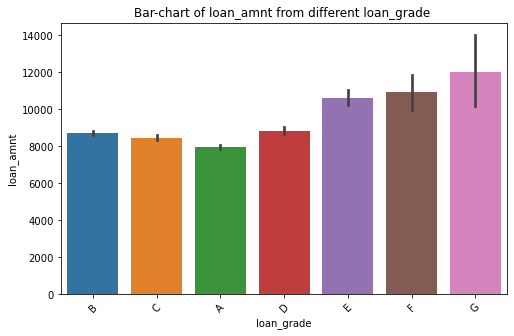

In [89]:
plt.figure(figsize =(8,5))
sns.barplot(x = 'loan_grade',y = 'loan_amnt', data = d)
plt.title("Bar-chart of loan_amnt from different loan_grade ")
plt.xticks(rotation = 45)
plt.show()

### Observation: From above graph loan_grade of A has less loan_amnt which is 8000.

#### Categorical-Categorical

<Figure size 1440x1080 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

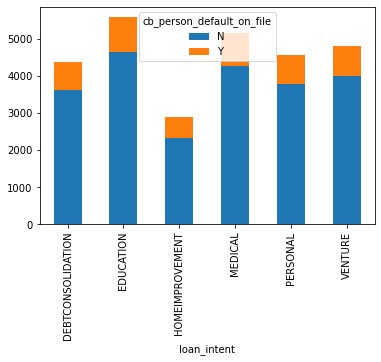

In [90]:
crosstab = pd.crosstab(d['loan_intent'],d['cb_person_default_on_file'])
plt.figure(figsize =(20,15))
plt.figure(figsize = (15,8))
crosstab.plot(kind = 'bar',stacked = True)
plt.show()

### Observation:This plot represent that loan_intent has more count for NO response and low count of Yes response.

### Multivariate Analysis

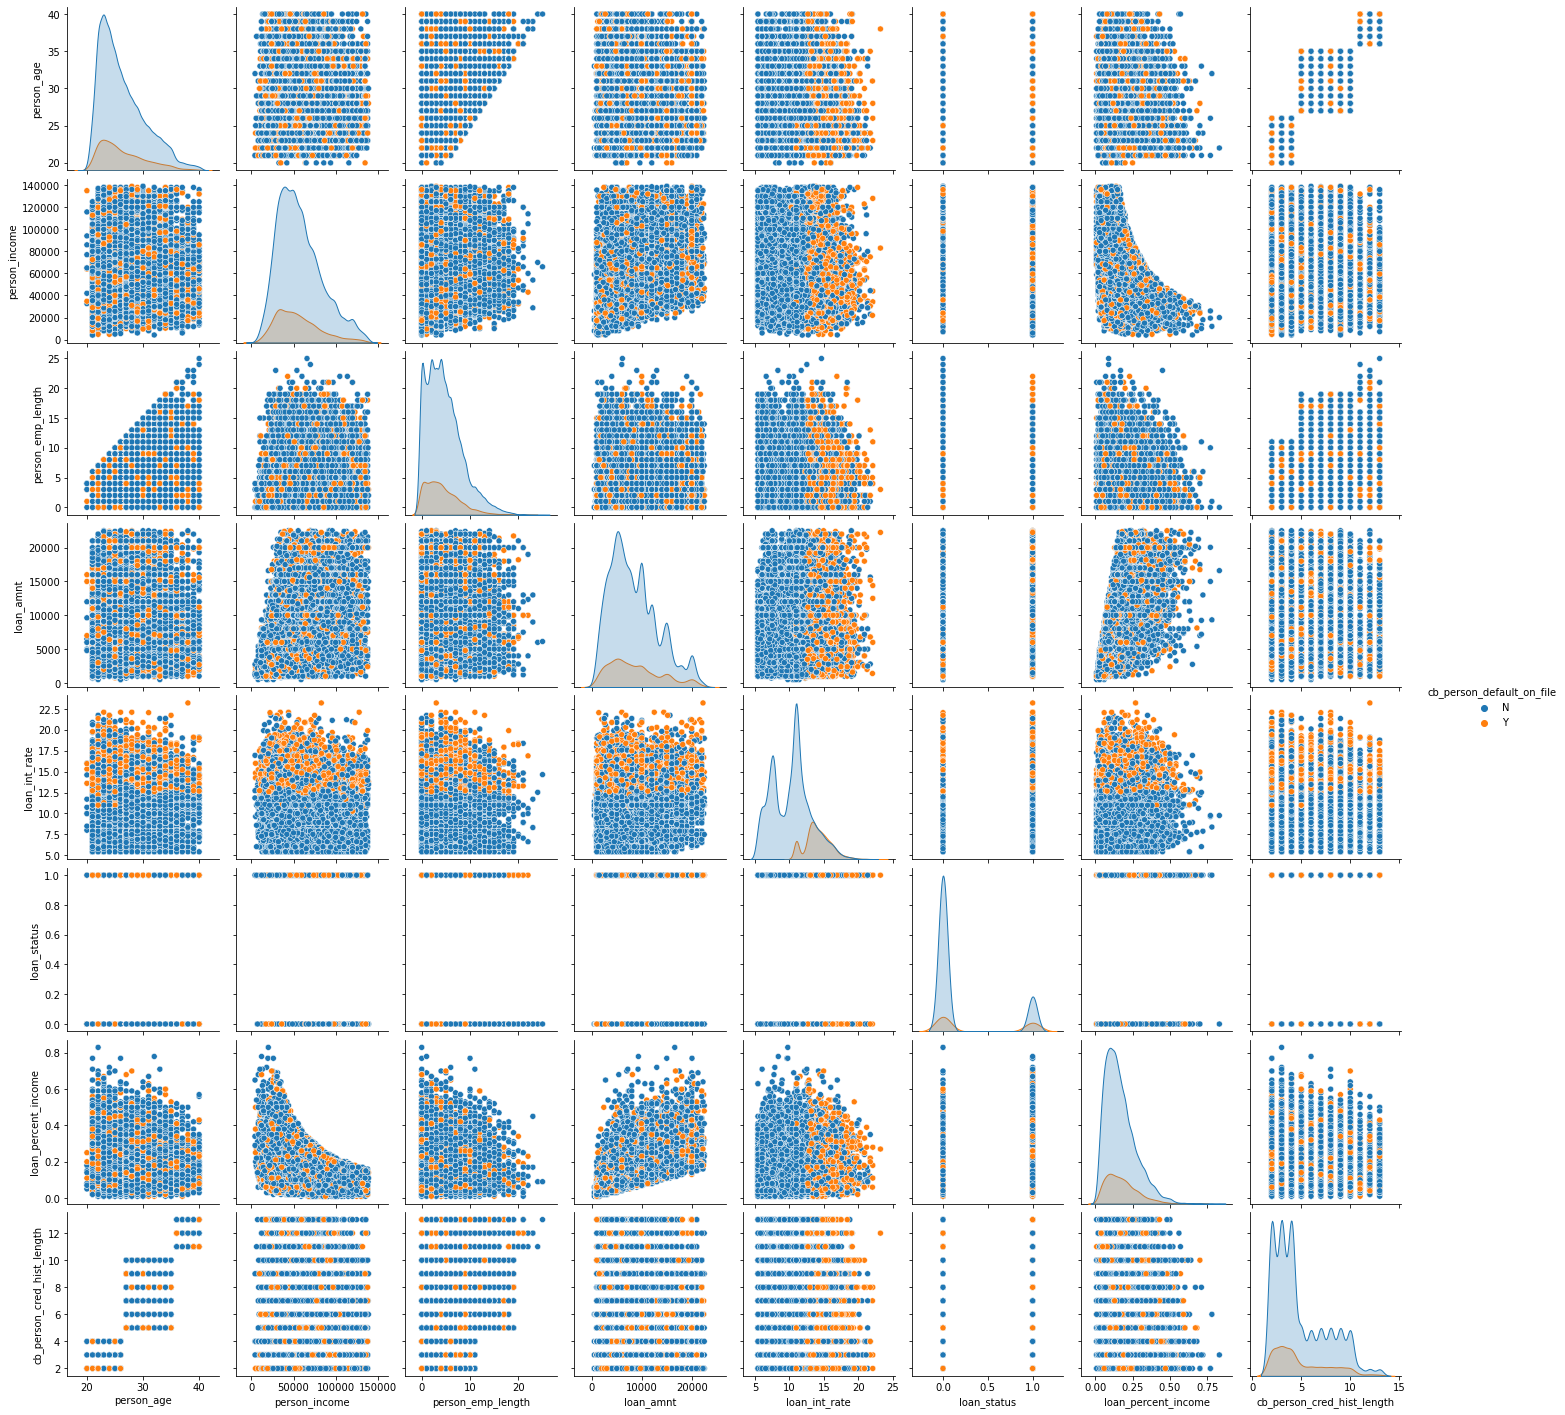

In [91]:
sns.pairplot(data=d,hue='cb_person_default_on_file')
plt.show()


<Figure size 14400x9000 with 0 Axes>

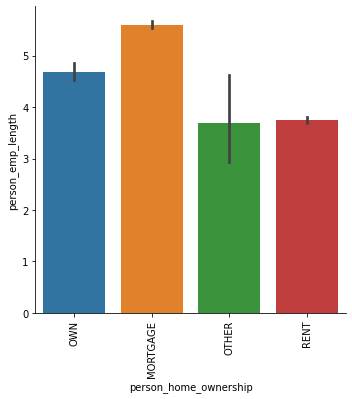

In [92]:
plt.figure(figsize=(200,125))
sns.catplot(x = 'person_home_ownership',y = 'person_emp_length',data = d, kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

### Observation: From this graph in 'person_home_ownership' Other has less count of 'person_emp_length'

### Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
- For regression task - Mean Absolute Error
- For classification task - Accuracy


In [93]:
d = d[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length','person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file']]
d.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,21,9600,5.0,1000,11.14,0,0.10,2,OWN,EDUCATION,B,N
1,25,9600,1.0,5500,12.87,1,0.57,3,MORTGAGE,MEDICAL,C,N
2,21,9900,2.0,2500,7.14,1,0.25,2,OWN,VENTURE,A,N
3,21,10000,6.0,1600,14.74,1,0.16,3,OWN,VENTURE,D,N
4,21,10000,2.0,4500,8.63,1,0.45,2,OWN,HOMEIMPROVEMENT,A,N


In [94]:
y=d['loan_status']
X=d[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length','person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file']]


In [95]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,21,9600,5.0,1000,11.14,0.10,2,OWN,EDUCATION,B,N
1,25,9600,1.0,5500,12.87,0.57,3,MORTGAGE,MEDICAL,C,N
2,21,9900,2.0,2500,7.14,0.25,2,OWN,VENTURE,A,N
3,21,10000,6.0,1600,14.74,0.16,3,OWN,VENTURE,D,N
4,21,10000,2.0,4500,8.63,0.45,2,OWN,HOMEIMPROVEMENT,A,N


In [96]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [97]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75, random_state = 100)

print(X_train.shape,y_train.shape)

print(X_test.shape,y_test.shape)

(20521, 11) (20521,)
(6841, 11) (6841,)


In [98]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_emp_length             float64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length      int64
person_home_ownership          object
loan_intent                    object
loan_grade                     object
cb_person_default_on_file      object
dtype: object

###  Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


### Separation of Categorical & Numerical feature on X_train data

In [99]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8626,22,52000,3.0,5200,10.99,0.10,4
25506,28,60000,3.0,19200,7.88,0.32,8
1424,23,95000,6.0,15000,9.88,0.16,4
11801,22,40000,4.0,12000,10.99,0.30,3
24688,30,32000,1.0,15000,12.42,0.47,5
...,...,...,...,...,...,...,...
12119,21,69000,5.0,12000,7.88,0.17,4
24423,31,76500,1.0,14000,11.49,0.18,10
14147,23,120000,7.0,10000,9.91,0.08,3
23320,32,37076,3.0,12000,12.42,0.32,7


In [100]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8626,RENT,EDUCATION,C,Y
25506,RENT,DEBTCONSOLIDATION,A,N
1424,RENT,EDUCATION,B,N
11801,RENT,VENTURE,B,N
24688,RENT,DEBTCONSOLIDATION,B,N
...,...,...,...,...
12119,RENT,DEBTCONSOLIDATION,A,N
24423,RENT,EDUCATION,B,N
14147,MORTGAGE,DEBTCONSOLIDATION,B,N
23320,RENT,PERSONAL,B,N


### Separation of Nominal and Ordinal columns from Categorical feature of X_train

In [101]:
X_train_cat_nominal=X_train_cat.drop('loan_grade',axis=1)
X_train_cat_ordinal=X_train_cat.drop(['person_home_ownership','loan_intent','cb_person_default_on_file'],axis=1)


In [102]:
X_train_cat_nominal

,person_home_ownership,loan_intent,cb_person_default_on_file
8626,RENT,EDUCATION,Y
25506,RENT,DEBTCONSOLIDATION,N
1424,RENT,EDUCATION,N
11801,RENT,VENTURE,N
24688,RENT,DEBTCONSOLIDATION,N
...,...,...,...
12119,RENT,DEBTCONSOLIDATION,N
24423,RENT,EDUCATION,N
14147,MORTGAGE,DEBTCONSOLIDATION,N
23320,RENT,PERSONAL,N


In [103]:
X_train_cat_ordinal

,loan_grade
8626,C
25506,A
1424,B
11801,B
24688,B
...,...
12119,A
24423,B
14147,B
23320,B


In [104]:
d['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'OTHER', 'RENT'], dtype=object)

In [105]:
d['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'PERSONAL',
       'DEBTCONSOLIDATION'], dtype=object)

In [106]:
d['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [107]:
d['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [108]:
X_train_cat.describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,20521,20521,20521,20521
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,10810,4189,7036,16972


In [109]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000
mean,26.309439,56968.247892,4.560596,8474.251986,10.915569,0.167585,4.897715
std,4.053955,26463.290925,3.666752,4887.812509,3.046399,0.102105,2.738010
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,36900.000000,2.000000,4925.000000,8.000000,0.090000,3.000000
50%,25.000000,52000.000000,4.000000,7500.000000,10.990000,0.150000,4.000000
75%,29.000000,72000.000000,7.000000,12000.000000,13.060000,0.220000,7.000000
max,40.000000,139008.000000,25.000000,22500.000000,23.220000,0.830000,13.000000


### Scaling the numerical features on X_train

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
8626,-1.063047,-0.187746,-0.425618,-0.669897,0.024433,-0.661940,-0.327879
25506,0.417025,0.114567,-0.425618,2.194440,-0.996469,1.492767,1.133071
1424,-0.816368,1.437186,0.392565,1.335139,-0.339940,-0.074292,-0.327879
11801,-1.063047,-0.641215,-0.152890,0.721352,0.024433,1.296885,-0.693117
24688,0.910383,-0.943528,-0.971073,1.335139,0.493851,2.961886,0.037358


In [111]:
X_train_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.052100e+04,2.052100e+04,2.052100e+04,2.052100e+04,2.052100e+04,2.052100e+04,2.052100e+04
mean,1.286541e-16,-7.525019e-17,3.842472e-16,-5.767252e-17,-1.568087e-16,-2.788515e-16,-5.615118e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.556404e+00,-1.998600e+00,-1.243800e+00,-1.631496e+00,-1.803999e+00,-1.543411e+00,-1.058354e+00
25%,-8.163681e-01,-7.583613e-01,-6.983452e-01,-7.261609e-01,-9.570774e-01,-7.598810e-01,-6.931167e-01
50%,-3.230107e-01,-1.877457e-01,-1.528901e-01,-1.993276e-01,2.443307e-02,-1.722336e-01,-3.278791e-01
75%,6.637040e-01,5.680366e-01,6.652925e-01,7.213521e-01,7.039403e-01,5.133551e-01,7.678337e-01
max,3.377169e+00,3.100210e+00,5.574388e+00,2.869605e+00,4.039106e+00,6.487771e+00,2.959259e+00


### Applying OneHotEncoding on Categorical Columns on X_train

In [112]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop ='first', sparse = False)

X_train_cat_nominal_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_nominal),
                              columns = encoder.get_feature_names_out(X_train_cat_nominal.columns),
                              index = X_train_cat_nominal.index) 

X_train_cat_nominal_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
8626,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
25506,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
24688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
X_train_cat_nominal_ohe.describe()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
count,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000
mean,0.003265,0.079821,0.526777,0.204132,0.104381,0.189757,0.166317,0.174894,0.172945
std,0.057048,0.271022,0.499295,0.403076,0.305761,0.392118,0.372374,0.379886,0.378209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Applying LabelEncoding on Categorical Columns on X_train

In [114]:
X_train_cat_ordinal_le = pd.DataFrame(index=X_train_cat_ordinal.index)

X_train_cat_ordinal_le.head()


""
8626
25506
1424
11801
24688


In [115]:
X_train_cat.loan_grade.unique()

array(['C', 'A', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [116]:
loan_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5,'B':6,'A':7}

X_train_cat_ordinal_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_encoder[x])

X_train_cat_ordinal_le.head()

,loan_grade
8626,5
25506,7
1424,6
11801,6
24688,6


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features for X_train

In [117]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_nominal_ohe,X_train_cat_ordinal_le],axis = 1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
8626,-1.063047,-0.187746,-0.425618,-0.669897,0.024433,-0.661940,-0.327879,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5
25506,0.417025,0.114567,-0.425618,2.194440,-0.996469,1.492767,1.133071,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1424,-0.816368,1.437186,0.392565,1.335139,-0.339940,-0.074292,-0.327879,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
11801,-1.063047,-0.641215,-0.152890,0.721352,0.024433,1.296885,-0.693117,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
24688,0.910383,-0.943528,-0.971073,1.335139,0.493851,2.961886,0.037358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

### Separation of Categorical & Numerical feature on X_test data

In [118]:
X_test_cat = X_test.select_dtypes(include = ['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
13212,RENT,VENTURE,C,N
19946,RENT,VENTURE,C,Y
6129,RENT,MEDICAL,A,N
24449,RENT,VENTURE,C,N
3246,RENT,PERSONAL,B,N


In [119]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13212,23,52800,4.0,14000,14.27,0.27,3
19946,32,40500,0.0,6000,14.26,0.15,5
6129,23,48500,1.0,6000,9.32,0.12,3
24449,30,85332,3.0,14000,14.22,0.16,7
3246,24,13000,4.0,4000,9.88,0.31,2


### Separation of Nominal and Ordinal columns from Categorical feature of X_test

In [120]:
X_test_cat_nominal=X_test_cat.drop('loan_grade',axis=1)
X_test_cat_ordinal=X_test_cat.drop(['person_home_ownership','loan_intent','cb_person_default_on_file'],axis=1)


In [121]:
X_test_cat_nominal

,person_home_ownership,loan_intent,cb_person_default_on_file
13212,RENT,VENTURE,N
19946,RENT,VENTURE,Y
6129,RENT,MEDICAL,N
24449,RENT,VENTURE,N
3246,RENT,PERSONAL,N
...,...,...,...
24751,RENT,DEBTCONSOLIDATION,Y
13728,RENT,VENTURE,N
26207,RENT,HOMEIMPROVEMENT,N
26641,RENT,HOMEIMPROVEMENT,N


In [122]:
X_test_cat_ordinal

,loan_grade
13212,C
19946,C
6129,A
24449,C
3246,B
...,...
24751,C
13728,B
26207,B
26641,A


### Scaling the numerical features on X_test

In [123]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
13212,-0.816368,-0.157514,-0.152890,1.130543,1.101140,1.003061,-0.693117
19946,1.403740,-0.622321,-1.243800,-0.506221,1.097858,-0.172234,0.037358
6129,-0.816368,-0.320008,-0.971073,-0.506221,-0.523768,-0.466057,-0.693117
24449,0.910383,1.071841,-0.425618,1.130543,1.084727,-0.074292,0.767834
3246,-0.569689,-1.661521,-0.152890,-0.915412,-0.339940,1.394826,-1.058354


### Applying OneHotEncoding on Categorical Columns on X_test

In [124]:
X_test_cat_nominal_ohe = pd.DataFrame(encoder.transform(X_test_cat_nominal), 
                               columns=encoder.get_feature_names_out(X_test_cat_nominal.columns), 
                               index = X_test_cat_ordinal.index)
X_test_cat_nominal_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
13212,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
6129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3246,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24751,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
26207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
26641,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Applying LabelEncoding on Categorical Columns on X_train

In [125]:
X_test_cat_ordinal_le = pd.DataFrame(index=X_test_cat_ordinal.index)
X_test_cat_ordinal_le.head()

X_test_cat_ordinal_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_encoder[x])
X_test_cat_ordinal_le.head()

,loan_grade
13212,5
19946,5
6129,7
24449,5
3246,6


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features for X_test

In [126]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_nominal_ohe,X_test_cat_ordinal_le],axis = 1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
13212,-0.816368,-0.157514,-0.152890,1.130543,1.101140,1.003061,-0.693117,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5
19946,1.403740,-0.622321,-1.243800,-0.506221,1.097858,-0.172234,0.037358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5
6129,-0.816368,-0.320008,-0.971073,-0.506221,-0.523768,-0.466057,-0.693117,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7
24449,0.910383,1.071841,-0.425618,1.130543,1.084727,-0.074292,0.767834,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5
3246,-0.569689,-1.661521,-0.152890,-0.915412,-0.339940,1.394826,-1.058354,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6


### Problem:
- Target variable: loan_status
- Historical available ? Yes
- Type: Supervised Learning
- Task : Classification

### Step-6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Logistic Regression
- KNN
- Support Vector Machines
- Decision Trees
- Navie Bayes
- Random Forest
- Ada Booster
- GBDT
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).

### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved

### Building a model:
#### Training- Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

### Prediction

In [128]:
y_test_predict = classifier.predict(X_test_transformed)

### Evaluation

In [129]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predict)


0.8533840081859377

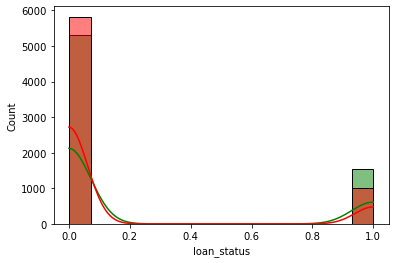

In [130]:
sns.histplot(y_test,color = 'green',alpha = 0.5,kde =True)
sns.histplot(y_test_predict,color = 'red',alpha = 0.5,kde = True)
plt.show()

### Training- KNeighbors Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.8843736295863178

### Training- Support Vector Classifier

In [132]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.8884665984505189

### Training- Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.8862739365589826

### Training _ Navie Bayes Classifier

In [134]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.8267797105686303

### Training- Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.9308580616868879

### Training- Adaptive Boost Classifier

In [136]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.8849583394240608

### Training - Gradient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(X_train_transformed,y_train)

y_test_predict = classifier.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)


0.9220874141207426

In [138]:
import pandas as pd
Data = {'Algorithms':['Logistic Classifier','KNN Classifier','Support Vector Classifier',' Decision Trees Classifier','Navie Bayes Classifier','Random Forest Classifier',
                           'Adaptive Boost Classifier','Gradient Boosting Classifier'],'Accuracy_Score': [0.8490040395598273,0.8809026326786461, 0.8845243070065468,0.8900961136648559,0.8210057111018247,0.9300738264382226,0.8841064215071737,0.9206017551190974]}

d = pd.DataFrame(Data)
d

,Algorithms,Accuracy_Score
0,Logistic Classifier,0.849004
1,KNN Classifier,0.880903
2,Support Vector Classifier,0.884524
3,Decision Trees Classifier,0.890096
4,Navie Bayes Classifier,0.821006
5,Random Forest Classifier,0.930074
6,Adaptive Boost Classifier,0.884106
7,Gradient Boosting Classifier,0.920602


<AxesSubplot:xlabel='Accuracy_Score', ylabel='Algorithms'>

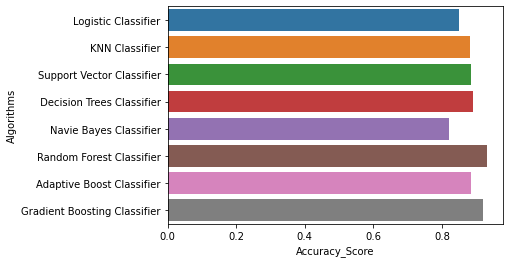

In [139]:
sns.barplot(y = d.Algorithms, x = d.Accuracy_Score)

### Write your conclusion on the best algorithm for the Loan Approval -(loan_status) prediction problem.

### Conclusion:
- Random Forest Classifier algorithm is the best model for  Loan Approval -(loan_status) prediction
- Compare to other algorithm accuracy_score(y_test, y_test_predict) of Random Forest Classifier there is a 
  maximum accuracy with 93%.

### Observation:
- Logistic Classifier: accuracy_score(y_test, y_test_predict)        = 0.8490040395598273
- KNN Classifier: accuracy_score(y_test, y_test_predict)             = 0.8809026326786461
- Support Vector Classifier: accuracy_score(y_test, y_test_predict)  = 0.8845243070065468
- Decision Trees Classifier: accuracy_score(y_test, y_test_predict)  = 0.8900961136648559
- Navie Bayes Classifier   : accuracy_score(y_test, y_test_predict)  = 0.8210057111018247
- Random Forest Classifier : accuracy_score(y_test, y_test_predict)  = 0.9300738264382226
- Adaptive Boost Classifier: accuracy_score(y_test, y_test_predict)  = 0.8841064215071737
- Gradient Boosting Classifier:accuracy_score(y_test, y_test_predict)= 0.9206017551190974